<a href="https://colab.research.google.com/github/ishandahal/ml_model_evaluation/blob/main/ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ROC** (Receiver Operating Characteristic)

- Loading the Wisconsin Breast Cancer Dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

- Converting class labels from string to integers

In [6]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

- Splitting Dataset into 20% test set and 80% training set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

- ROC

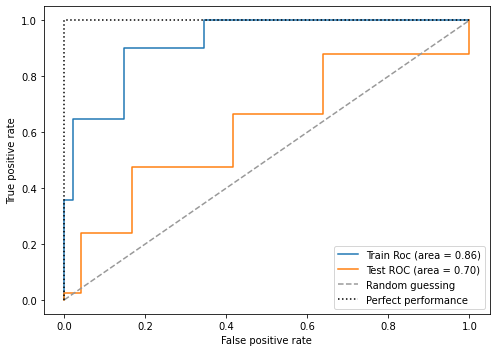

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import numpy as np

## Using fewer features to make the the curve more interesting
X_train2 = X_train[:, [4, 14]]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

fig = plt.figure(figsize=(7, 5))

### Trainging ROC Curve
train_probas = pipe_knn.fit(X_train2,
                            y_train).predict_proba(X_train2)

fpr, tpr, thresholds = roc_curve(y_train,
                                 train_probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)

plt.step(fpr,
         tpr,
         label=f"Train Roc (area = {roc_auc:.2f})")
### TEST ROC CURVE
test_probas = pipe_knn.predict_proba(X_test[:, [4, 14]])

fpr, tpr, thresholds = roc_curve(y_test,
                                 test_probas[:, 1],
                                 pos_label=1)
roc_auc = auc(fpr, tpr)

plt.step(fpr, tpr,
         where='post',
         label=f'Test ROC (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

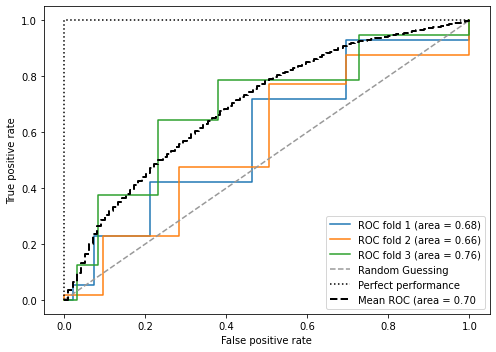

In [30]:
from sklearn.model_selection import StratifiedKFold

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

X_train2 = X_train[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3,
                          shuffle=True,
                          random_state=1).split(X_train2, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_knn.fit(X_train2[train],
                          y_train[train]).predict_proba(X_train2[test])
    
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.step(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})', where='post')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label="Random Guessing")
plt.step([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance', where='post')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.step(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f}', lw=2, where='post')

plt.xlim([-0.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [31]:
mean_tpr

array([0.        , 0.03507541, 0.06430287, 0.09609989, 0.13046203,
       0.16516087, 0.19985971, 0.23455855, 0.26469081, 0.28636702,
       0.30278127, 0.31801411, 0.33324696, 0.3484798 , 0.36371265,
       0.37894549, 0.39417833, 0.40941118, 0.42464402, 0.43987687,
       0.45510971, 0.47022044, 0.48467988, 0.49892888, 0.51053238,
       0.52213588, 0.53373938, 0.54534288, 0.55694638, 0.56870366,
       0.5804853 , 0.59226695, 0.6040486 , 0.61583025, 0.6276119 ,
       0.63939355, 0.6511752 , 0.66295684, 0.67391236, 0.68398786,
       0.69406336, 0.70413887, 0.71421437, 0.72428987, 0.73436537,
       0.74444088, 0.75438168, 0.76354316, 0.77270464, 0.78186612,
       0.7910276 , 0.79757311, 0.80406237, 0.81055163, 0.81704088,
       0.82353014, 0.83001939, 0.83650865, 0.8429979 , 0.84948716,
       0.85597641, 0.86246567, 0.86895492, 0.87544418, 0.88193343,
       0.88842269, 0.89491194, 0.9014012 , 0.90789045, 0.91376012,
       0.91744647, 0.92113282, 0.92473403, 0.92752166, 0.93030

### **Balanced Accuracy**

In [39]:
pip install mlxtend

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.evaluate import accuracy_score
import numpy as np

In [46]:
y_targ = np.array(3*[0] + 69*[1] + 18*[2])
y_pred = np.array(10*[0] + 50*[1] + 30*[2])

In [ ]:
std_acc = accuracy_score(y_targ, y_pred)

bin_acc0 = accuracy_score(y_targ, y_pred, pos_label=0)
bin_acc1 = accuracy_score(y_targ, y_pred, method='binary', pos_label=1)
bin_acc2 = accuracy_score(y_targ, y_pred, method='binary', pos_label=2)

avg_acc = accuracy_score(y_targ, y_pred, method='average')

print(f"Standard accuracy: {std_acc*100:.2f}%")
print(f"Class 0 accuracy: {bin_acc0*100:.2f}%")
print(f"Class 1 accuracy: {bin_acc1*100:.2f}%")
print(f"Class 2 accuracy: {bin_acc2*100:.2f}%")
print(f"Average per-class accuracy: {avg_acc*100:.2f}%")